## Demonstrations

In [2]:
from Lie_algebras import *
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### 1. Speedup using Pauli decomposition for complete_algebra

In [2]:
# Easy example comparison, complete {X, I, Z}

easy = [X, I, Z]
easy_pauli = [Pauli([X]), Pauli([I]), Pauli([Z])]

%timeit complete_algebra(easy, 5)
%timeit pauli_complete_algebra(easy_pauli, 5)

503 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.54 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
# Medium example comparison, complete {X_1Y_2Z_5, Z_1Y_2Y_4Y_5, X_1X_2Y_3Z_4}

medium = [np.kron(X, np.kron(Y, np.kron(I, np.kron(I, Z)))), np.kron(Z, np.kron(Y, np.kron(I, np.kron(Y, Y)))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, I))))]
medium_pauli = [Pauli([X, Y, I, I, Z]), Pauli([Z, Y, I, Y, Y]), Pauli([X, X, Y, Z, I])]

%timeit complete_algebra(medium, 10)
%timeit pauli_complete_algebra(medium_pauli, 10)

8.16 ms ± 768 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.8 ms ± 640 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
# Hard example comparison

q, r, s, t = Pauli([X, Y, Z, I, Z]), Pauli([Z, Z, I, Y, Y]), Pauli([X, X, Y, Z, I]), Pauli([X, Y, Z, I, I])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, Z)))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, Y)))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, I)))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, I))))

hard = [ql + rl, 2*ql + sl + 5*tl, 3*rl + sl - 2*tl]
hard_pauli = [q + r, 2*q + s + 5*t, 3*r + s - 2*t]

print("For 5 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([X, Y, Z, I, Z, Y]), Pauli([Z, Z, I, Y, Y, Z]), Pauli([X, X, Y, Z, I, Z]), Pauli([X, Y, Z, I, I, Y])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, Y))))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, Z))))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, Z))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, Y)))))

hard = [ql + rl, 2*ql + sl + 5*tl, 3*rl + sl - 2*tl]
hard_pauli = [q + r, 2*q + s + 5*t, 3*r + s - 2*t]

print("For 6 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([Y, Z, I, Z, Y, Y, X]), Pauli([Z, I, Y, Y, Z, I, Y]), Pauli([X, Y, Z, I, Z, X, Z]), Pauli([Y, Z, I, I, Y, Z, I])
ql, rl, sl, tl = np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(Y, np.kron(Y, X)))))), np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, np.kron(Z, np.kron(I, Y)))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(X, Z)))))), np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, np.kron(Y, np.kron(Z, I))))))

hard = [ql + rl, 2*ql + sl, 3*rl + sl - tl]
hard_pauli = [q + r, 2*q + s, 3*r + s - t]

print("For 7 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([X, Y, Z, I, Z, Y, Y, X]), Pauli([Z, Z, I, Y, Y, Z, I, Y]), Pauli([X, X, Y, Z, I, Z, X, Z]), Pauli([X, Y, Z, I, I, Y, Z, I])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(Y, np.kron(Y, X))))))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, np.kron(Z, np.kron(I, Y))))))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(X, Z))))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, np.kron(Y, np.kron(Z, I)))))))

hard = [ql + rl, 2*ql + sl, 3*rl + sl - tl]
hard_pauli = [q + r, 2*q + s, 3*r + s - t]

print("For 8 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([X, Y, Z, I, Z, Y, Y, X, I]), Pauli([Z, Z, I, Y, Y, Z, I, Y, X]), Pauli([X, X, Y, Z, I, Z, X, Z, X]), Pauli([X, Y, Z, I, I, Y, Z, I, Z])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(Y, np.kron(Y, np.kron(X, I)))))))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Y, X)))))))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(X, np.kron(Z, X)))))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, np.kron(Y, np.kron(Z, np.kron(I, Z))))))))

hard = [ql + rl, 2*ql + sl, 3*rl + sl - tl]
hard_pauli = [q + r, 2*q + s, 3*r + s - t]

print("For 9 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

For 5 qubits:
13.2 ms ± 821 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
37.3 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 6 qubits:
200 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
109 ms ± 7.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 7 qubits:
397 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
100 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 8 qubits:
1.62 s ± 243 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
202 ms ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
For 9 qubits:
7.11 s ± 370 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
152 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
# Super hard for fun

q, r, s, t, u = Pauli([X, Y, Z, I, Z, Y, Y, X, X, I]), Pauli([Z, Z, I, Y, Y, Z, I, Y, I, Y]), Pauli([X, X, Y, Z, I, Z, X, Z, Y, Z]), Pauli([I, Y, Z, I, X, X, Z, I, Z, Z]), Pauli([I, Y, Y, I, X, Y, Z, I, I, X])

hard_pauli = [q + r + s, 2*q + s - 1j*u, 3*r + s - t]

%timeit pauli_complete_algebra(hard_pauli, 20)

1.23 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


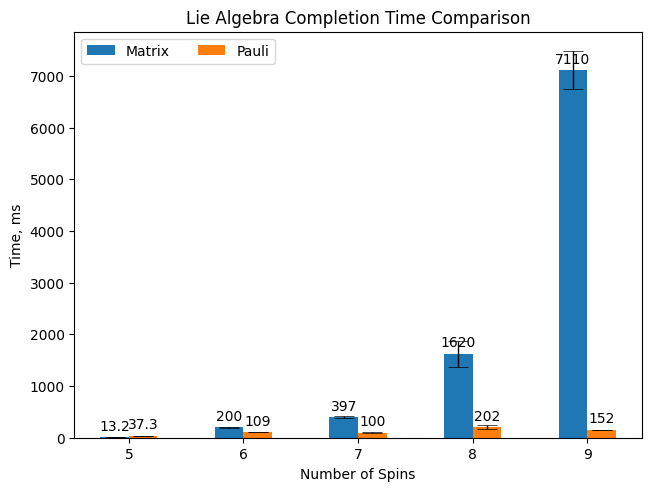

In [66]:
# Plotting

spins = ("5", "6", "7", "8", "9")
representation = {
    'Matrix': (13.2, 200, 397, 1620, 7110, 0.821, 3.83, 21.3, 243, 370),
    'Pauli': (37.3, 109, 100, 202, 152, 1.75, 7.15, 4.74, 41.9, 5.19),
}

x = np.arange(len(spins))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in representation.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement[0:5], width, label=attribute)
    ax.bar_label(rects, padding=3)
    ax.errorbar(x + offset, measurement[0:5], yerr=measurement[5:10], fmt='None', color='0.6', ecolor='black', elinewidth=1, capsize=7, capthick=0.5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time, ms')
ax.set_xlabel('Number of Spins')
ax.set_title('Lie Algebra Completion Time Comparison')
ax.set_xticks(x + 0.5*width, spins)
ax.legend(loc='upper left', ncols=2)

plt.show()

#### 2. Size of generated sets for $H:\Bigl\{\{Z_j\}_{j=1}^n, \{X_jX_{j+1}\}_{j=1}^{n}\Bigr\}$ and $I_k: \Bigl\{Z_1Z_k\Bigr\}$

In [3]:
# Import relevant examples

file = open('set_1_periodic', 'rb')
set_1_periodic_dict = pickle.load(file)
file.close()

In [10]:
# Find sizes of each (n, k)

keys = set_1_periodic_dict.keys()
print([f"{key}: {len(set_1_periodic_dict[key])}" for key in keys])

['n3k1: 30', 'n4k1: 70', 'n4k2: 70', 'n4k3: 70', 'n5k1: 420', 'n5k2: 420', 'n6k1: 990', 'n7k1: 2002']


In [9]:
# 2-body interactions example: see all Z_1Z_j are in set

filtering(set_1_periodic_dict['n4k1'], 2)

[(1, Pauli([Z, Z, I, I])),
 ((-0-8j), Pauli([Y, I, X, I])),
 ((-0-8j), Pauli([I, Y, I, X])),
 ((16+0j), Pauli([X, I, X, I])),
 ((-16-0j), Pauli([Y, I, Y, I])),
 ((16+0j), Pauli([Z, I, Z, I])),
 ((16+0j), Pauli([I, X, I, X])),
 ((-16-0j), Pauli([I, Y, I, Y])),
 ((16+0j), Pauli([I, Z, I, Z])),
 (-32j, Pauli([X, I, Y, I])),
 (-32j, Pauli([I, X, I, Y])),
 ((64+0j), Pauli([I, Z, Z, I])),
 ((64+0j), Pauli([Z, I, I, Z])),
 ((256+0j), Pauli([I, I, Z, Z]))]

#### 2. Finding algebras for Hamiltonian $H: \{\sum_n Z_n, \sum_n X_nX_{n+1}\}$ with periodic boundary conditions and variable invariant $Inv$

In [3]:
# contruct H for n = 3, 4, ..., 7

H =[]
for n in range(3, 8):
    # op1 = Z_1+...+Z_n, op2 = X_1X_2+...+X_nX_1
    ops1, ops2 = [], []
    for i in range(n):
        new_op = [I for i in range(n)]
        new_op[i] = Z
        ops1.append(new_op)
    for i in range(n):
        new_op = [I for i in range(n)]
        new_op[i] = X
        new_op[(i+1)%n] = X
        ops2.append(new_op)
    op1 = Pauli(ops1[0])
    op2 = Pauli(ops2[0])
    for j in range(1, len(ops1)):
        op1 += Pauli(ops1[j])
    for j in range(1, len(ops2)):
        op2 += Pauli(ops2[j])
    H.append((op1, op2))

In [4]:
# completing H without using invariants (warning: takes 3min40 to run!)

print("The full algebra: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    alg_full = pauli_complete_algebra([op1, op2], 30)
    print(f"n={n}: length={len(alg_full)}: algebra={alg_full}")

The full algebra: (n:length:algebra)
n=3: length=8: algebra=[SuperPauli([(1, Pauli([Z, I, I])), (1, Pauli([I, Z, I])), (1, Pauli([I, I, Z]))]), SuperPauli([(1, Pauli([X, X, I])), (1, Pauli([I, X, X])), (1, Pauli([X, I, X]))]), SuperPauli([(2j, Pauli([Y, X, I])), (2j, Pauli([Y, I, X])), (2j, Pauli([X, Y, I])), (2j, Pauli([I, Y, X])), (2j, Pauli([I, X, Y])), (2j, Pauli([X, I, Y]))]), SuperPauli([((8+0j), Pauli([X, X, I])), ((8+0j), Pauli([X, I, X])), ((-8+0j), Pauli([Y, Y, I])), ((-8+0j), Pauli([Y, I, Y])), ((8+0j), Pauli([I, X, X])), ((-8+0j), Pauli([I, Y, Y]))]), SuperPauli([((-8+0j), Pauli([Z, I, I])), ((-8+0j), Pauli([Z, X, X])), ((-8+0j), Pauli([I, Z, I])), ((-8+0j), Pauli([X, Z, X])), ((-8+0j), Pauli([I, I, Z])), ((-8+0j), Pauli([X, X, Z]))]), SuperPauli([((-0-16j), Pauli([Y, Z, X])), ((-0-16j), Pauli([Y, X, Z])), ((-0-16j), Pauli([Z, Y, X])), ((-0-16j), Pauli([X, Y, Z])), ((-0-16j), Pauli([Z, X, Y])), ((-0-16j), Pauli([X, Z, Y]))]), SuperPauli([((128+0j), Pauli([Z, I, I])), ((64+0

KeyboardInterrupt: 

In [5]:
print("Hello world")

Hello world


In [3]:
# finding algebra with Inv = Z_1Z_n

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[n-1] = Z, Z
    op3 = Pauli(ops3)
    Inv.append(op3)

print("Invariant = Z_1Z_n: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_find_algebra([op3], [op1, op2], 10)
    print(f"n={n}: length={len(alg)}: algebra={alg}")

Invariant = Z_1Z_n: (n:length:algebra)
n=3: length=4: algebra=[SuperPauli([(1, Pauli([Z, I, Z]))]), SuperPauli([(2j, Pauli([Y, X, Z])), (2j, Pauli([Z, X, Y]))]), SuperPauli([((4+0j), Pauli([X, X, I])), ((4+0j), Pauli([I, X, X]))]), SuperPauli([((32+0j), Pauli([Z, I, Z])), ((-32+0j), Pauli([Y, I, Y]))])]
n=4: length=4: algebra=[SuperPauli([(1, Pauli([Z, I, I, Z]))]), SuperPauli([(2j, Pauli([Y, X, I, Z])), (2j, Pauli([Z, I, X, Y]))]), SuperPauli([((4+0j), Pauli([X, X, I, I])), ((4+0j), Pauli([I, I, X, X]))]), SuperPauli([((32+0j), Pauli([Z, I, I, Z])), ((-32+0j), Pauli([Y, X, X, Y]))])]
n=5: length=4: algebra=[SuperPauli([(1, Pauli([Z, I, I, I, Z]))]), SuperPauli([(2j, Pauli([Y, X, I, I, Z])), (2j, Pauli([Z, I, I, X, Y]))]), SuperPauli([((4+0j), Pauli([X, X, I, I, I])), ((4+0j), Pauli([I, I, I, X, X]))]), SuperPauli([((32+0j), Pauli([Z, I, I, I, Z])), ((-32+0j), Pauli([Y, X, I, X, Y]))])]
n=6: length=4: algebra=[SuperPauli([(1, Pauli([Z, I, I, I, I, Z]))]), SuperPauli([(2j, Pauli([Y, X, 

In [4]:
# finding algebra with Inv = X_1X_n

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[n-1] = X, X
    op3 = Pauli(ops3)
    Inv.append(op3)

print("Invariant = X_1X_n: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_find_algebra([op3], [op1, op2], 10)
    print(f"n={n}: length={len(alg)}: algebra={alg}")

Invariant = X_1X_n: (n:length:algebra)
n=3: length=4: algebra=[SuperPauli([(1, Pauli([X, I, X]))]), SuperPauli([(-2j, Pauli([Y, I, X])), (-2j, Pauli([X, I, Y]))]), SuperPauli([((4+0j), Pauli([Z, I, I])), ((4+0j), Pauli([I, I, Z]))]), SuperPauli([((32+0j), Pauli([X, I, X])), ((-32-0j), Pauli([Y, I, Y]))])]
n=4: length=4: algebra=[SuperPauli([(1, Pauli([X, I, I, X]))]), SuperPauli([(-2j, Pauli([Y, I, I, X])), (-2j, Pauli([X, I, I, Y]))]), SuperPauli([((4+0j), Pauli([Z, I, I, I])), ((4+0j), Pauli([I, I, I, Z]))]), SuperPauli([((32+0j), Pauli([X, I, I, X])), ((-32-0j), Pauli([Y, I, I, Y]))])]
n=5: length=4: algebra=[SuperPauli([(1, Pauli([X, I, I, I, X]))]), SuperPauli([(-2j, Pauli([Y, I, I, I, X])), (-2j, Pauli([X, I, I, I, Y]))]), SuperPauli([((4+0j), Pauli([Z, I, I, I, I])), ((4+0j), Pauli([I, I, I, I, Z]))]), SuperPauli([((32+0j), Pauli([X, I, I, I, X])), ((-32-0j), Pauli([Y, I, I, I, Y]))])]
n=6: length=4: algebra=[SuperPauli([(1, Pauli([X, I, I, I, I, X]))]), SuperPauli([(-2j, Pauli(

In [5]:
# finding algebra with Inv = X_1Y_n

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[n-1] = X, Y
    op3 = Pauli(ops3)
    Inv.append(op3)

print("Invariant = X_1Y_n: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_find_algebra([op3], [op1, op2], 10)
    print(f"n={n}: length={len(alg)}: algebra={alg}")

Invariant = X_1Y_n: (n:length:algebra)
n=3: length=10: algebra=[SuperPauli([(1, Pauli([X, I, Y]))]), SuperPauli([(-2j, Pauli([Y, I, Y])), (2j, Pauli([X, I, X]))]), SuperPauli([(-2j, Pauli([X, X, Z])), (-2j, Pauli([I, I, Z]))]), SuperPauli([((4+0j), Pauli([Z, I, I])), ((4+0j), Pauli([I, I, Z]))]), SuperPauli([((4+0j), Pauli([I, X, X])), ((4+0j), Pauli([X, I, X]))]), SuperPauli([(-8j, Pauli([Y, I, X])), (-8j, Pauli([I, X, Y])), (-8j, Pauli([X, I, Y]))]), SuperPauli([((32+0j), Pauli([X, I, Y])), ((32+0j), Pauli([Y, I, X]))]), SuperPauli([((-16-0j), Pauli([Y, X, Z]))]), SuperPauli([(64j, Pauli([I, I, Z])), (64j, Pauli([Z, I, I])), (32j, Pauli([X, X, Z]))]), SuperPauli([((-0+64j), Pauli([X, I, X])), ((-0+64j), Pauli([I, X, X])), (-32j, Pauli([Y, I, Y]))])]
n=4: length=10: algebra=[SuperPauli([(1, Pauli([X, I, I, Y]))]), SuperPauli([(-2j, Pauli([Y, I, I, Y])), (2j, Pauli([X, I, I, X]))]), SuperPauli([(-2j, Pauli([X, I, X, Z])), (-2j, Pauli([I, I, I, Z]))]), SuperPauli([((4+0j), Pauli([Z, I, 

In [6]:
# finding algebra with Inv = Z_1Z_{n/2}

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[int(n/2)] = Z, Z
    op3 = Pauli(ops3)
    Inv.append(op3)

print("Invariant = Z_1Z_{n/2}: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_find_algebra([op3], [op1, op2], 10)
    print(f"n={n}: length={len(alg)}: algebra={alg}")

Invariant = Z_1Z_{n/2}: (n:length:algebra)
n=3: length=4: algebra=[SuperPauli([(1, Pauli([Z, Z, I]))]), SuperPauli([(2j, Pauli([Z, Y, X])), (2j, Pauli([Y, Z, X]))]), SuperPauli([((4+0j), Pauli([I, X, X])), ((4+0j), Pauli([X, I, X]))]), SuperPauli([((32+0j), Pauli([Z, Z, I])), ((-32+0j), Pauli([Y, Y, I]))])]
n=4: length=4: algebra=[SuperPauli([(1, Pauli([Z, I, Z, I]))]), SuperPauli([(2j, Pauli([Y, X, Z, I])), (2j, Pauli([Z, X, Y, I])), (2j, Pauli([Z, I, Y, X])), (2j, Pauli([Y, I, Z, X]))]), SuperPauli([((4+0j), Pauli([X, X, I, I])), ((4+0j), Pauli([I, X, X, I])), ((4+0j), Pauli([I, I, X, X])), ((4+0j), Pauli([X, I, I, X]))]), SuperPauli([((64+0j), Pauli([Z, I, Z, I])), ((-64+0j), Pauli([Y, I, Y, I])), ((-64+0j), Pauli([Y, X, Y, X])), ((64+0j), Pauli([Z, X, Z, X]))])]
n=5: length=7: algebra=[SuperPauli([(1, Pauli([Z, I, Z, I, I]))]), SuperPauli([(2j, Pauli([Y, X, Z, I, I])), (2j, Pauli([Z, X, Y, I, I])), (2j, Pauli([Z, I, Y, X, I])), (2j, Pauli([Y, I, Z, I, X]))]), SuperPauli([((4+0j), P

In [7]:
# finding algebra with Inv = X_1X_2, X_{n-1}X_n

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops4 = [I for i in range(n)]
    ops3[0], ops3[1] = X, X
    ops4[n-2], ops4[n-1] = X, X
    op3, op4 = Pauli(ops3), Pauli(ops4)
    Inv.append((op3, op4))

print("Invariant = X_1X_2, X_{n-1}X_n: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3][0]
    op4 = Inv[n-3][1]
    alg = pauli_find_algebra([op3, op4], [op1, op2], 30)
    print(f"n={n}: length={len(alg)}: algebra={alg}")

Invariant = X_1X_2, X_{n-1}X_n: (n:length:algebra)
n=3: length=15: algebra=[SuperPauli([(1, Pauli([X, X, I]))]), SuperPauli([(1, Pauli([I, X, X]))]), SuperPauli([(-2j, Pauli([Y, X, I])), (-2j, Pauli([X, Y, I]))]), SuperPauli([(-2j, Pauli([I, Y, X])), (-2j, Pauli([I, X, Y]))]), SuperPauli([((4+0j), Pauli([Z, I, I])), ((4+0j), Pauli([I, Z, I]))]), SuperPauli([((4+0j), Pauli([X, Z, X]))]), SuperPauli([((4+0j), Pauli([I, Z, I])), ((4+0j), Pauli([I, I, Z]))]), SuperPauli([(-8j, Pauli([Y, Z, X])), ((-0+8j), Pauli([X, Z, Y]))]), SuperPauli([(-8j, Pauli([I, Y, X]))]), SuperPauli([(-8j, Pauli([X, Y, I]))]), SuperPauli([((16+0j), Pauli([I, Y, Y]))]), SuperPauli([((-16-0j), Pauli([Y, Y, I]))]), SuperPauli([(32j, Pauli([Y, Z, X]))]), SuperPauli([((-64-0j), Pauli([X, Z, X])), ((-64+0j), Pauli([Y, Z, Y]))]), SuperPauli([((16+0j), Pauli([I, Z, I]))])]
n=4: length=8: algebra=[SuperPauli([(1, Pauli([X, X, I, I]))]), SuperPauli([(1, Pauli([I, I, X, X]))]), SuperPauli([(-2j, Pauli([Y, X, I, I])), (-2j, P

In [10]:
# finding algebra with Inv = X_1Y_n, Y_2X_{n-1}

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops4 = [I for i in range(n)]
    ops3[0], ops3[n-1] = X, Y
    ops4[1], ops4[n-2] = Y, X
    op3, op4 = Pauli(ops3), Pauli(ops4)
    Inv.append((op3, op4))

print("Invariant = X_1Y_n, Y_2X_{n-1}: (n:length:algebra)")
for n in range(3, 8):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3][0]
    op4 = Inv[n-3][1]
    alg = pauli_find_algebra([op3, op4], [op1, op2], 100)
    print(f"n={n}: length={len(alg)}: algebra={alg}")

Invariant = X_1Y_n, Y_2X_{n-1}: (n:length:algebra)
n=3: length=21: algebra=[SuperPauli([(1, Pauli([X, I, Y]))]), SuperPauli([(1, Pauli([I, X, I]))]), SuperPauli([(-2j, Pauli([Y, I, Y])), (2j, Pauli([X, I, X]))]), SuperPauli([(-2j, Pauli([X, X, Z])), (-2j, Pauli([I, I, Z]))]), SuperPauli([(-2j, Pauli([I, Y, I]))]), SuperPauli([((4+0j), Pauli([Z, I, I])), ((4+0j), Pauli([I, I, Z]))]), SuperPauli([((4+0j), Pauli([I, X, X])), ((4+0j), Pauli([X, I, X]))]), SuperPauli([((4+0j), Pauli([I, Z, I]))]), SuperPauli([(-8j, Pauli([Y, I, X])), (-8j, Pauli([I, X, Y])), (-8j, Pauli([X, I, Y]))]), SuperPauli([(-8j, Pauli([X, Z, Z]))]), SuperPauli([((16+0j), Pauli([I, Z, X]))]), SuperPauli([((-16-0j), Pauli([X, Y, Z]))]), SuperPauli([((32+0j), Pauli([X, I, Y])), ((32+0j), Pauli([Y, I, X]))]), SuperPauli([((-16-0j), Pauli([Y, X, Z]))]), SuperPauli([(64j, Pauli([I, I, Z])), (64j, Pauli([Z, I, I])), (32j, Pauli([X, X, Z]))]), SuperPauli([(-32j, Pauli([I, Z, Y]))]), SuperPauli([((-0+64j), Pauli([X, I, X])), 

MaxOperatorsError: Maximum of 100 operators in uncomplete algebra reached.